In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [3]:
#loading csv file
df = pd.read_csv("Datasets/Vaccination_Coverage_among_Young_Children__0-35_Months__20241101.csv")

#sorting by vaccine type (column is named 'Vaccine')
df_sorted = df.sort_values (by='Vaccine')

#Displaying the sorted DataFrame
df_sorted

#dropping columns
df = df.drop(columns=['Geography Type'])

df

#filtering DF again to keep only rows where Dimension Type = 'Age' 
df = df[df['Dimension Type'] == 'Age']
df

,Vaccine,Dose,Geography,Birth Year/Birth Cohort,Dimension Type,Dimension,Estimate (%),95% CI (%),Sample Size
0,DTaP,≥3 Doses,North Dakota,2019,Age,19 Months,93.5,88.0 to 96.6,263.0
1,DTaP,≥3 Doses,North Dakota,2018,Age,19 Months,95.2,91.0 to 97.5,293.0
2,DTaP,≥3 Doses,North Dakota,2018-2019,Age,19 Months,91.8,88.3 to 94.3,556.0
3,Polio,≥3 Doses,North Dakota,2021,Age,19 Months,89.4,81.9 to 94.1,143.0
4,Polio,≥2 Doses,North Dakota,2021,Age,5 Months,79.3,69.0 to 86.8,143.0
...,...,...,...,...,...,...,...,...,...
128183,Hep A,≥2 Doses,New Hampshire,2021,Age,24 Months,46.7,36.7 to 58.0,126.0
128184,DTaP,≥3 Doses,New Hampshire,2021,Age,19 Months,95.0,90.2 to 97.5,126.0
128185,Hep B,≥3 Doses,New Hampshire,2020-2021,Age,24 Months,95.5,92.5 to 97.5,315.0
128186,PCV,≥3 Doses,New Hampshire,2021,Age,7 Months,70.0,59.6 to 78.7,126.0


In [4]:
# Defining a dictionary to map each state to respective region
#expanding from original 4 regions to 9 regions: 
    #Pacific West, Mountain West, West North Central, East North Central, East South Central 
    # West South Central, South Atlantic, Middle Atlantic, New England
state_to_region = {
    # Middle Atlantic
    'New York': 'Middle Atlantic', 'NY-Rest of state': 'Middle Atlantic', 'NY-City of New York': 'Middle Atlantic', 
    'New Jersey': 'Middle Atlantic', 'Pennsylvania': 'Middle Atlantic', 
    'PA-Philadelphia': 'Middle Atlantic', 'PA-Rest of state': 'Middle Atlantic',

    # New England
    'Vermont': 'New England', 'New Hampshire': 'New England', 'Massachusetts': 'New England', 
    'Connecticut': 'New England', 'Rhode Island': 'New England', 'Maine': 'New England',

    # East North Central
    'Indiana': 'East North Central', 'Illinois': 'East North Central', 'Michigan':'East North Central', 'Ohio': 'East North Central', 
    'Wisconsin': 'East North Central', 'IL-City of Chicago': 'East North Central', 
    'IL-Rest of state': 'East North Central',

    # West North Central
    'Iowa': 'West North Central', 'Kansas': 'West North Central', 'Minnesota': 'West North Central',
    'Missouri': 'West North Central', 'Nebraska': 'West North Central', 'North Dakota': 'West North Central', 
    'South Dakota': 'West North Central',

    #South Atlantic
    'Delaware': 'South Atlantic', 'District of Columbia': 'South Atlantic', 'Florida': 'South Atlantic', 
    'Georgia': 'South Atlantic', 'Maryland': 'South Atlantic', 'North Carolina': 'South Atlantic', 'South Carolina': 'South Atlantic',
    'Virginia': 'South Atlantic', 'West Virginia': 'South Atlantic',

    #East South Central
    'Alabama': 'East South Central', 'Kentucky': 'East South Central', 'Mississippi': 'East South Central', 
    'Tennessee': 'East South Central', 

    #West South Central
    'Arkansas': 'West South Central', 'Louisiana': 'West South Central', 'Oklahoma': 'West South Central', 
    'Texas': 'West South Central', 'TX-City of Houston': 'West South Central', 'TX-Rest of state': 'West South Central',
    'TX-Dallas County': 'West South Central', 'TX-Bexar County':'West South Central', 'TX-El Paso County': 'West South Central',
    'TX-Hidalgo County': 'West South Central', 'TX-Tarrant County':'West South Central',

    #Mountain 
    'Arizona': 'Mountain', 'Colorado': 'Mountain', 'Idaho':'Mountain', 'New Mexico':'Mountain', 
    'Montana': 'Mountain', 'Utah':'Mountain', 'Nevada': 'Mountain', 'Wyoming': 'Mountain',

    #Pacific
    'Alaska': 'Pacific', 'California': 'Pacific', 'Hawaii': 'Pacific', 'Oregon': 'Pacific',
    'Washington': 'Pacific'
}

# Mapping each state in the 'Geography' column to its region
df['Region'] = df['Geography'].map(state_to_region)

# Reordering columns so that 'Region' appears first
df = df[['Region'] + [col for col in df.columns if col != 'Region']]

# Display the updated DataFrame
df



,Region,Vaccine,Dose,Geography,Birth Year/Birth Cohort,Dimension Type,Dimension,Estimate (%),95% CI (%),Sample Size
0,West North Central,DTaP,≥3 Doses,North Dakota,2019,Age,19 Months,93.5,88.0 to 96.6,263.0
1,West North Central,DTaP,≥3 Doses,North Dakota,2018,Age,19 Months,95.2,91.0 to 97.5,293.0
2,West North Central,DTaP,≥3 Doses,North Dakota,2018-2019,Age,19 Months,91.8,88.3 to 94.3,556.0
3,West North Central,Polio,≥3 Doses,North Dakota,2021,Age,19 Months,89.4,81.9 to 94.1,143.0
4,West North Central,Polio,≥2 Doses,North Dakota,2021,Age,5 Months,79.3,69.0 to 86.8,143.0
...,...,...,...,...,...,...,...,...,...,...
128183,New England,Hep A,≥2 Doses,New Hampshire,2021,Age,24 Months,46.7,36.7 to 58.0,126.0
128184,New England,DTaP,≥3 Doses,New Hampshire,2021,Age,19 Months,95.0,90.2 to 97.5,126.0
128185,New England,Hep B,≥3 Doses,New Hampshire,2020-2021,Age,24 Months,95.5,92.5 to 97.5,315.0
128186,New England,PCV,≥3 Doses,New Hampshire,2021,Age,7 Months,70.0,59.6 to 78.7,126.0


In [5]:
# Filter the DataFrame to only include rows where:
# - 'Vaccine' is 'DTaP' and 'MMR'
# - 'Birth Cohort' is '2020-2021'

# Create df_filtered based on conditions in the 'Vaccine' and 'Birth Year/Birth Cohort' columns
df_filtered = df[
    (df['Vaccine'].isin(['DTaP','≥1 Dose MMR'])) &
    (df['Birth Year/Birth Cohort'] == '2020-2021') &
    (df['Dimension'] =='24 Months')
    
    ]

# Rename the column 'Estimate (%)' to 'Estimated Percentage' in df_filtered
df_filtered = df_filtered.rename(columns={'Estimate (%)': 'Estimated_Percentage'})

# Exclude rows where 'Region' is NaN
df_filtered = df_filtered.dropna(subset=['Region'])

df_filtered


,Region,Vaccine,Dose,Geography,Birth Year/Birth Cohort,Dimension Type,Dimension,Estimated_Percentage,95% CI (%),Sample Size
40,West North Central,DTaP,≥3 Doses,North Dakota,2020-2021,Age,24 Months,90.3,86.0 to 93.7,391.0
3982,West North Central,DTaP,≥4 Doses,Kansas,2020-2021,Age,24 Months,77.6,72.3 to 82.4,634.0
4395,West North Central,DTaP,≥3 Doses,Nebraska,2020-2021,Age,24 Months,95.5,92.5 to 97.5,422.0
6751,West North Central,DTaP,≥3 Doses,Kansas,2020-2021,Age,24 Months,91.1,87.5 to 93.9,634.0
7823,West North Central,DTaP,≥3 Doses,Iowa,2020-2021,Age,24 Months,93.2,89.1 to 96.1,455.0
...,...,...,...,...,...,...,...,...,...,...
125333,Mountain,DTaP,≥4 Doses,Arizona,2020-2021,Age,24 Months,75.7,69.3 to 81.6,437.0
125338,Mountain,≥1 Dose MMR,NaN,Arizona,2020-2021,Age,24 Months,85.6,80.3 to 90.1,437.0
125961,West North Central,DTaP,≥3 Doses,South Dakota,2020-2021,Age,24 Months,88.8,83.2 to 93.3,483.0
126555,East North Central,DTaP,≥3 Doses,Wisconsin,2020-2021,Age,24 Months,91.5,87.7 to 94.6,485.0


In [6]:
# Define the 9 regions including 'East South Central'
regions_of_interest = ['Middle Atlantic', 'Pacific', 'Mountain', 
                       'West North Central', 'East North Central', 'West South Central', 
                       'South Atlantic', 'New England', 'East South Central']

# Filter the dataset for 'DTaP' and 'MMR' vaccines, and the 9 specific regions
df_filtered = df_filtered[df_filtered['Vaccine'].isin(['DTaP', '≥1 Dose MMR'])]
df_filtered = df_filtered[df_filtered['Region'].isin(regions_of_interest)]

# Ensure that 'Region' and 'Vaccine' are treated as categorical variables
df_filtered['Region'] = df_filtered['Region'].astype('category')
df_filtered['Vaccine'] = df_filtered['Vaccine'].astype('category')

# Fit the model with interaction term between 'Region' and 'Vaccine'
model = ols('Estimated_Percentage ~ C(Region) + C(Vaccine) + C(Region):C(Vaccine)', data=df_filtered).fit()

# Perform the two-way ANOVA
anova_results = anova_lm(model)

# Display the ANOVA table
print(anova_results)


                         df       sum_sq     mean_sq          F    PR(>F)
C(Region)               8.0   871.386112  108.923264   2.961007  0.004052
C(Vaccine)              1.0   714.306694  714.306694  19.417954  0.000019
C(Region):C(Vaccine)    8.0    25.367042    3.170880   0.086198  0.999525
Residual              162.0  5959.314095   36.785889        NaN       NaN


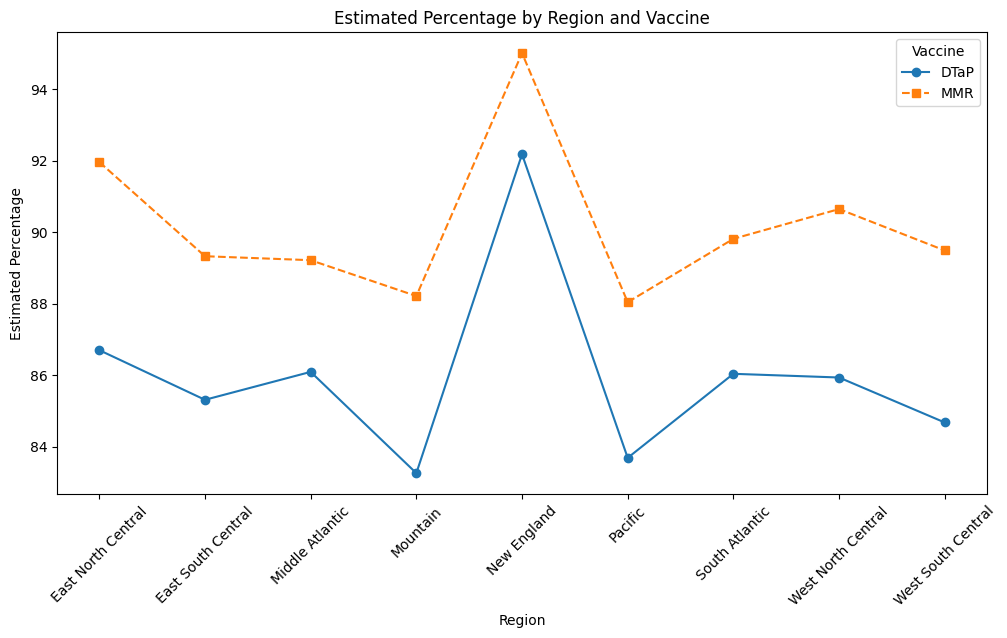

In [7]:


# Calculate the mean 'Estimated Percentage' for each Region and Vaccine combination
means = df_filtered.groupby(['Region', 'Vaccine'])['Estimated_Percentage'].mean().reset_index()

# Separate the data by Vaccine for plotting
dtap_means = means[means['Vaccine'] == 'DTaP']
mmr_means = means[means['Vaccine'] == '≥1 Dose MMR']

# Plot the mean Estimated Percentage by Region for each Vaccine type
plt.figure(figsize=(12, 6))

# Plot DTaP means
plt.plot(dtap_means['Region'], dtap_means['Estimated_Percentage'], marker='o', linestyle='-', label='DTaP')

# Plot MMR means
plt.plot(mmr_means['Region'], mmr_means['Estimated_Percentage'], marker='s', linestyle='--', label='MMR')

# Customize the plot
plt.title('Estimated Percentage by Region and Vaccine')
plt.xlabel('Region')
plt.ylabel('Estimated Percentage')
plt.xticks(rotation=45)
plt.legend(title='Vaccine')
plt.show()


In [ ]:
# p-value changes depending on what age group is being focused on
# if we're only focusing on the uptake rates of each vaccine depending on 
# the age at which they are released, then there is no signficance between
# vaccine type in terms of uptake

#BUT if we are considering age, for ex. 35 months is an age where children should
# have received at least 1 dose of MMR and at least 3 doses of DTaP (which does
# not include any children who received just 1 or 2 doses but are 35 months old anyways
#and technically did receive vaccination, just not fully up to date), then there is
# a significant different between vaccine types